In [ ]:
from google.colab import files
uploaded = files.upload()

Saving InSet.csv to InSet.csv


In [ ]:
#@title Twitter Auth Token

twitter_auth_token = '3497fee48c34c915a73a0079e073b554f0fe0eeb' # change this auth token

In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

In [ ]:
# Crawl Data

filename = 'sty.csv'
search_keyword = 'sty since:2023-12-16 until:2024-05-20 lang:id'
limit = 100

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

In [ ]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

In [ ]:
# Load data
import pandas as pd
import re

df = pd.read_csv('sty.csv')

# Hapus duplikat dan data kosong
df = df.drop_duplicates(subset=['full_text'])
df = df.dropna(subset=['full_text'])

# Fungsi cleaning

def full_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

# Terapkan pembersihan
df['full_text'] = df['full_text'].apply(full_text)
df['full_text'] = df['full_text'].str.lower()
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
# Normalisasi Data
norm = {
    " dr ": " dari ", " jgn ": " jangan ", " yg ": " yang ", " nggak ": " tidak ", " ngga ": " tidak ",
    " ttg ": " tentang ", " jdi ": " jadi ", " klean ": " kalian ", " mksd ": " maksud ",
    " hrs ": " harus ", " text ": " teks ", " alg ": " saling ", " tdk ": " tidak ",
    " stelah ": " setelah ", " gak ": " tidak ", " ya ": " iya ", " knp ": " kenapa ",
    " sdh ": " sudah ", " sbg ": " sebagai ", " br ": " baru ", " blm ": " belum ",
    " krn ": " karena ", " mrk ": " mereka ", " hny ": " hanya ", " dn ": " dan ",
    " jls ": " jelas ", " tsb ": " tersebut ", " utk ": " untuk ", " dll ": " dan lain-lain ",
    " kpd ": " kepada ", " dpt ": " dapat ", " thdp ": " terhadap ", " pd ": " pada ",
    " nggu ": " nunggu ", " pngn ": " pengen ", " pgn ": " pengen ", " klo ": " kalau ",
    " kl ": " kalau ", " bngt ": " banget ", " gt ": " gitu ", " gtu ": " begitu ",
    " udah ": " sudah ", " bhw ": " bahwa ", " bknnya ": " bukannya ", " dmn ": " dimana ",
    " ajah ": " saja ", " aja ": " saja ", " doang ": " saja ", " kok ": " mengapa ",
    " sih ": " ", " deh ": " ", " dah ": " sudah ", " lo ": " kamu ", " lu ": " kamu ",
    " gue ": " saya ", " gw ": " saya ", " ane ": " saya ", " ama ": " sama ",
    " sm ": " sama ", " smp ": " sampai ", " tp ": " tapi ", " trus ": " terus ",
    " trs ": " terus ", " dgn ": " dengan ", " ama ": " sama ", " bgt ": " banget ",
    " lbh ": " lebih ", " mkn ": " mungkin ", " pke ": " pakai ", " pake ": " pakai ",
    " bgtu ": " begitu ", " aj ": " saja ", " lgsung ": " langsung ", " lsg ": " langsung ",
    " ttp ": " tetap ", " skrg ": " sekarang ", " kmrn ": " kemarin ", " cm ": " cuma ",
    " cmn ": " cuma ", " cma ": " cuma ", " dlu ": " dulu ", " d ": " di ",
    " n ": " dan ", " trnyata ": " ternyata ", " plg ": " paling ", " sy ": " saya ",
    " sdg ": " sedang ", " bsa ": " bisa ", " bs ": " bisa ", " trsbt ": " tersebut ",
    " bnr ": " benar ", " dkit ": " sedikit ", " org ": " orang ", " ny ": " nya ",
    " sj ": " saja ", " scr ": " secara ", " kloq ": " kalau ", " kn ": " kan "
}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df.to_csv('normalisasi_data.csv', index=False)


In [ ]:
!pip install Sastrawi
# Stopword Removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, ArrayDictionary

more_stop_words = ["yang", "dan", "itu", "adalah", "di", "ke", "dari", "apa"]
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemoverFactory().create_stop_word_remover()

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.to_csv('stopword.csv', index=False)

In [ ]:
# Tokenizing

df = pd.read_csv('stopword.csv')
df['full_text'] = df['full_text'].apply(lambda x: ', '.join(x.split()))
df.to_csv('tokenize.csv', index=False)

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas() # aktifkan tqdm untuk pandas
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text_cleaning):
    return stemmer.stem(text_cleaning)

df = pd.read_csv("tokenize.csv", encoding='latin1')
df['full_text'] = df['full_text'].astype(str).progress_apply(stemming)
df.to_csv('stemming.csv', index=False, encoding='utf-8')


  0%|          | 0/1123 [00:00<?, ?it/s]

In [ ]:
def stemming(text_cleaning):
    return stemmer.stem(text_cleaning)


In [ ]:
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membaca data
data = pd.read_csv('stemming.csv')
data_tweet = data['full_text'].astype(str).tolist()

# Membaca leksikon
inset = pd.read_csv('InSet.csv')
lexicon = dict(zip(inset['word'], inset['weight']))

# Variabel hasil
status = []
total_positif = total_negatif = total_netral = total = 0

# Proses pelabelan sentimen
for tweet in data_tweet:
    tokens = tweet.lower().split()
    polaritas = 0
    for word in tokens:
        if word in lexicon:
            polaritas += lexicon[word]

    if polaritas > 0:
        status.append('Positif')
        total_positif += 1
    elif polaritas < 0:
        status.append('Negatif')
        total_negatif += 1
    else:
        status.append('Netral')
        total_netral += 1
    total += 1

# Menyimpan hasil ke file baru
data['klasifikasi_lexicon'] = status
data.to_csv('labelling.csv', index=False)

# Menampilkan ringkasan
print("Hasil Analisis Data:")
print(f"Positif = {total_positif}")
print(f"Negatif = {total_negatif}")
print(f"Netral  = {total_netral}")
print(f"\nTotal Data: {total}")


Hasil Analisis Data:
Positif = 105
Negatif = 938
Netral  = 80

Total Data: 1123


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/tmp/ipython-input-40-1577904371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Positif", "Negatif", "Netral"], y=[total_positif, total_negatif, total_netral], palette="pastel")


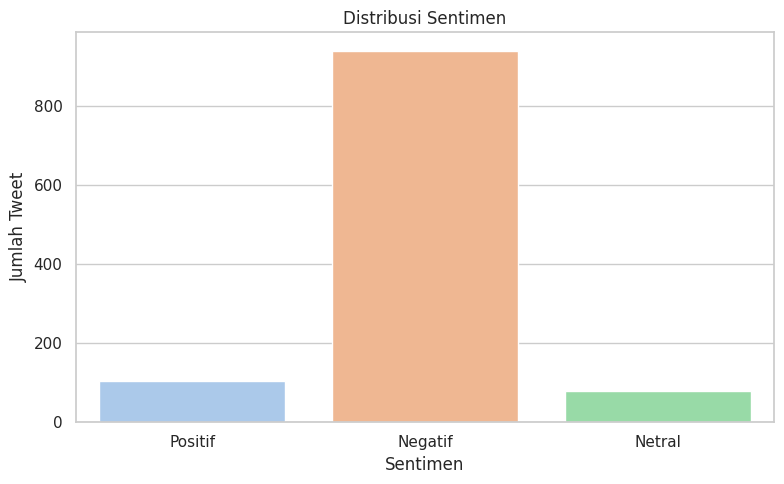

In [ ]:
# ======== Visualisasi Bar Chart ========
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")
sns.barplot(x=["Positif", "Negatif", "Netral"], y=[total_positif, total_negatif, total_netral], palette="pastel")
plt.title('Distribusi Sentimen')
plt.ylabel('Jumlah Tweet')
plt.xlabel('Sentimen')
plt.tight_layout()
plt.show()

In [ ]:
# --- NAIVE BAYES ---
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('labelling.csv')
data['full_text'] = data['full_text'].astype(str)

X_text = data['full_text']
y = data['klasifikasi_lexicon']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Prediksi
y_pred_test = nb_classifier.predict(X_test)
akurasi = accuracy_score(y_test, y_pred_test)
print(f"Akurasi Test: {akurasi:.2f}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred_test))

y_pred_all = nb_classifier.predict(X)
sentimen_counts = pd.Series(y_pred_all).value_counts().reindex(['Positif', 'Negatif'], fill_value=0)
data['prediksi_sentimen'] = y_pred_all

data[['full_text', 'prediksi_sentimen']].to_csv('hasil_prediksi.csv', index=False)
print("Hasil prediksi disimpan dalam 'hasil_prediksi.csv'")


Akurasi Test: 0.84
Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.89      0.97      0.93       189
      Netral       0.25      0.05      0.09        19
     Positif       0.27      0.24      0.25        17

    accuracy                           0.84       225
   macro avg       0.47      0.42      0.42       225
weighted avg       0.79      0.84      0.80       225

Hasil prediksi disimpan dalam 'hasil_prediksi.csv'


/tmp/ipython-input-44-3508372219.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')


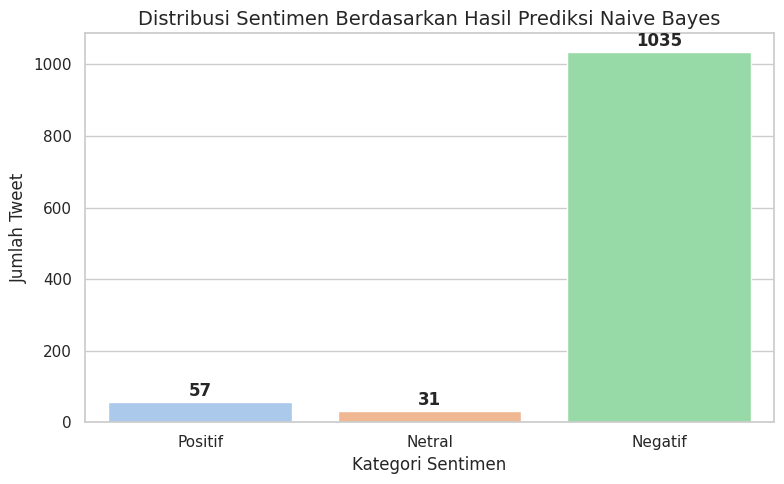

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file hasil prediksi
df = pd.read_csv('hasil_prediksi.csv')

# Hitung jumlah kategori sentimen
sentimen_counts = df['prediksi_sentimen'].value_counts().reindex(['Positif', 'Netral', 'Negatif'], fill_value=0)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
barplot = sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette='pastel')

# Tambahkan angka di atas batang
for i, value in enumerate(sentimen_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Judul dan label
plt.title('Distribusi Sentimen Berdasarkan Hasil Prediksi Naive Bayes', fontsize=14)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.tight_layout()
plt.show()


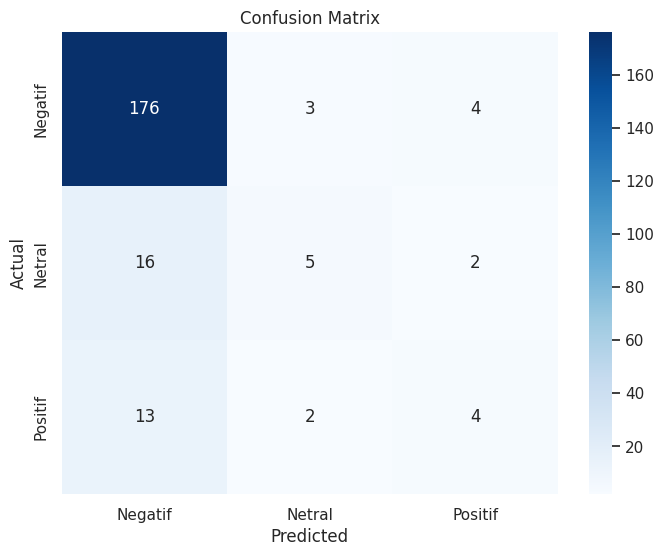

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_smote = confusion_matrix(y_test, y_pred_test)
labels = sorted(y_test.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=labels,
yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y, y_pred_all))

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.88      0.99      0.93       913
      Netral       0.81      0.39      0.53       107
     Positif       0.87      0.40      0.55       103

    accuracy                           0.88      1123
   macro avg       0.85      0.59      0.67      1123
weighted avg       0.87      0.88      0.86      1123



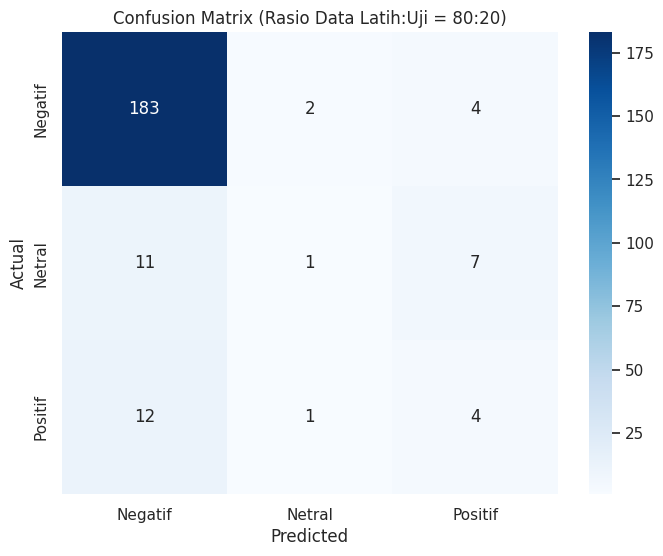

Classification Report (Evaluasi pada Seluruh Data):

              precision    recall  f1-score   support

     Negatif       0.90      0.99      0.94       938
      Netral       0.81      0.31      0.45        80
     Positif       0.77      0.42      0.54       105

    accuracy                           0.89      1123
   macro avg       0.82      0.57      0.64      1123
weighted avg       0.88      0.89      0.87      1123



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Rasio Pembagian Data
# Dalam penelitian ini, data dibagi dengan rasio 80:20,
# yaitu 80% digunakan sebagai data latih dan 20% sebagai data uji
# untuk memastikan bahwa model dapat dilatih secara optimal dan diuji secara adil terhadap data yang belum dikenalnya.

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_test)
labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Rasio Data Latih:Uji = 80:20)')
plt.show()

# Classification Report
print("Classification Report (Evaluasi pada Seluruh Data):\n")
print(classification_report(y, y_pred_all))
